# **JOB GUARDIAN**

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense, Input
from tensorflow.keras.models import Model

In [45]:
# Load the dataset
data = pd.read_csv('/content/fake_job_postings.csv')

In [46]:
data.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [48]:
# Drop unnecessary columns
data.drop(['department', 'salary_range', 'job_id'], axis=1, inplace=True)

In [49]:
data.head(2)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [50]:
# Fill missing values with empty string
data.fillna(" ", inplace=True)

In [51]:
# Combine text columns into a single column
data['job_description'] = data['title'] + ' ' + data['location'] + ' ' + data['company_profile'] + ' ' + data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['employment_type'] + ' ' + data['required_experience'] + ' ' + data['required_education'] + ' ' + data['industry'] + ' ' + data['function']

In [52]:
# Drop individual text columns
data.drop(['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis=1, inplace=True)

In [53]:
# Reset index
data.reset_index(inplace=True)

<Axes: >

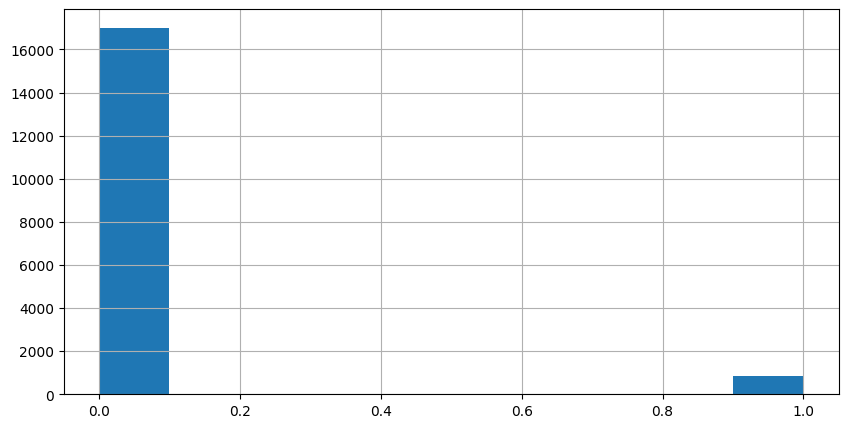

In [54]:
# Plot the distribution of target variable
data['fraudulent'].hist(figsize=(10, 5))

In [55]:
# Tokenize and pad the text data
voc_size = 5000
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(data['job_description'])
sequences = tokenizer.texts_to_sequences(data['job_description'])
sent_length = 100
sent_with_same_length = pad_sequences(sequences, padding='post', maxlen=sent_length)

In [32]:
# Build the model
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(Bidirectional(LSTM(150)))
model.add(Dropout(0.40))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Prepare data for training
X_final = np.array(sent_with_same_length)
y_final = np.array(data['fraudulent'])
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [34]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)

Epoch 1/15
224/224 [==============================] - 134s 574ms/step - loss: 0.1846 - accuracy: 0.9523 - val_loss: 0.1053 - val_accuracy: 0.9684
Epoch 2/15
224/224 [==============================] - 107s 480ms/step - loss: 0.0886 - accuracy: 0.9740 - val_loss: 0.1102 - val_accuracy: 0.9636
Epoch 3/15
224/224 [==============================] - 102s 456ms/step - loss: 0.0543 - accuracy: 0.9842 - val_loss: 0.0834 - val_accuracy: 0.9782
Epoch 4/15
224/224 [==============================] - 108s 481ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0959 - val_accuracy: 0.9740
Epoch 5/15
224/224 [==============================] - 102s 455ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.1276 - val_accuracy: 0.9743
Epoch 6/15
224/224 [==============================] - 101s 452ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.1229 - val_accuracy: 0.9760
Epoch 7/15
224/224 [==============================] - 103s 462ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1467 -

In [35]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

112/112 [==============================] - 12s 95ms/step


In [36]:
# Display metrics
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3395    0]
 [ 181    0]]
0.9493847874720358
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Save the model
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

In [39]:
# Save the TFLite model to a file
with open('final_model.tflite', 'wb') as f:
    f.write(tflite_model)

# **TESTING**

In [56]:
# Sample user input (One by One Input)
user_title = "Data Analyst"
user_location = "San Francisco, CA"
user_company_profile = "ABC Analytics is a leading data analytics company."
user_description = "Looking for a skilled data analyst with experience in Python and SQL. Bachelor's degree in Statistics preferred."
user_requirements = "2+ years of experience in data analysis. Proficiency in Python and SQL. Strong analytical and problem-solving skills."
user_benefits = "Competitive salary, health insurance, and flexible work hours."
user_employment_type = "Full-time"
user_experience = "Mid-Senior level"
user_education = "Bachelor's Degree"
user_industry = "Information Technology"
user_function = "Data Analyst"

# Combine text columns into a single column
user_input_description = (
    user_title + ' ' + user_location + ' ' + user_company_profile + ' ' +
    user_description + ' ' + user_requirements + ' ' + user_benefits + ' ' +
    user_employment_type + ' ' + user_experience + ' ' + user_education + ' ' +
    user_industry + ' ' + user_function
)

# Tokenize and pad the text data
user_sequence = tokenizer.texts_to_sequences([user_input_description])
user_padded_sequence = pad_sequences(user_sequence, padding='post', maxlen=sent_length)

# Reshape for model input
user_input_for_model = np.array(user_padded_sequence)

# Make prediction
user_predicted_prob = model.predict(user_input_for_model)[0][0]
user_predicted_class = 1 if user_predicted_prob > 0.5 else 0

# Display the prediction
print("Predicted Probability:", user_predicted_prob)
print("Predicted Class (0: Non-fraudulent, 1: Fraudulent):", user_predicted_class)

1/1 [==============================] - 0s 109ms/step
Predicted Probability: 0.17965621
Predicted Class (0: Non-fraudulent, 1: Fraudulent): 0


Hasil prediksi menunjukkan bahwa model memberikan probabilitas sekitar 0.18 untuk kejadian yang dimaksud (dalam konteks ini, kemungkinan bahwa posisi pekerjaan tersebut adalah palsu atau penipuan).

Dalam klasifikasi biner seperti ini, biasanya kita menetapkan ambang batas tertentu (biasanya 0.5) untuk menentukan apakah prediksi dikategorikan sebagai kelas 0 (non-fraudulent) atau kelas 1 (fraudulent).

Dalam kasus ini, karena probabilitas prediksi sekitar 0.18 kurang dari 0.5, model memprediksi bahwa posisi pekerjaan tersebut adalah non-fraudulent (kelas 0). Artinya, model cenderung percaya bahwa posisi pekerjaan tersebut tidak bersifat penipuan berdasarkan informasi yang diberikan dalam input.

In [57]:
# Sample user input (Job_desc input)
sample_input = {
    'job_description': "Software Engineer New York XYZ Corp Seeking a skilled software engineer with 3+ years of experience in Java development. Bachelor's degree in Computer Science required. Competitive salary and benefits. Full-time position in the Technology department."
}

# Combine text columns into a single column
sample_input['job_description'] = (
    sample_input['job_description'] +
    ' ' + '' + ' ' + '' + ' ' + '' + ' ' + '' + ' ' + '' + ' ' + '' + ' ' + '' + ' ' + ''
)

# Tokenize and pad the text data
sample_sequence = tokenizer.texts_to_sequences([sample_input['job_description']])
sample_padded_sequence = pad_sequences(sample_sequence, padding='post', maxlen=sent_length)

# Reshape for model input
sample_input_for_model = np.array(sample_padded_sequence)

# Make prediction
predicted_prob = model.predict(sample_input_for_model)[0][0]
predicted_class = 1 if predicted_prob > 0.5 else 0

# Display the prediction
print("Predicted Probability:", predicted_prob)
print("Predicted Class (0: Non-fraudulent, 1: Fraudulent):", predicted_class)

1/1 [==============================] - 0s 46ms/step
Predicted Probability: 7.843359e-06
Predicted Class (0: Non-fraudulent, 1: Fraudulent): 0


Hasil prediksi menunjukkan bahwa model memberikan probabilitas sangat rendah, sekitar 0.00000784, untuk kejadian yang dimaksud (kemungkinan bahwa posisi pekerjaan tersebut adalah palsu atau penipuan). Probabilitas yang sangat rendah ini menunjukkan keyakinan model bahwa posisi pekerjaan tersebut adalah non-fraudulent (kelas 0).

Dalam konteks klasifikasi biner, kita menetapkan ambang batas (biasanya 0.5) untuk mengategorikan hasil prediksi menjadi kelas 0 (non-fraudulent) atau kelas 1 (fraudulent). Dalam kasus ini, karena probabilitas yang sangat rendah, model memprediksi bahwa posisi pekerjaan tersebut dengan sangat yakin adalah non-fraudulent (kelas 0).